## 1. Dice rolls

In [7]:
import random as rnd 

path = "files/dice_rolls.txt" #Sets the path to our file
with open(path, "w") as dice: #Open the file using write
    
    dice.write("Simulated Dice Rolls: ") #Write the first line

    dice_rolls_list = [] #Creates an empty list
    i = 0 #Initialise i to 0 so that we can later remove the last comma
    for roll in range(20): #Run this 20 times
        dice_rolls_list.append(rnd.randint(1, 6)) #Append a random number (between 1 and 6) to the list
        if i == 19:
            dice.write(f"{str(dice_rolls_list[i])}") #Print the final output without a comma
        else: 
            dice.write(f"{str(dice_rolls_list[i])}, ") #Print the output with a comma after
        i += 1 #Incremenet i with 1

    dice.write("\nSorted Dice Rolls: ") #Starting wit a new line, write a second line

    dice_rolls_sorted = sorted(dice_rolls_list) #Sort the list and store it in a new list
    i = 0 #Initialise i to 0 again
    for roll in dice_rolls_sorted: #Run this 20 times
        if i == 19:
            dice.write(f"{str(dice_rolls_sorted[i])}") #Print the final output without a comma
        else: 
            dice.write(f"{str(dice_rolls_sorted[i])}, ") #Print the output with a comma after
        i += 1 #Incremenet i with 1

    number_of_fours = str(dice_rolls_list.count(4)) #Count the number of fours and save the output as a string
    dice.write(f"\nNumber of Fours: {number_of_fours}") #Starting with a new line, write the number of fours to the textfile

## 2. Test results

In [61]:
path2 = "files/test_result.txt"

with open (path2, "r") as f1, open (path2, "a") as f2:
    results = [result.strip("\n") for result in f1] #Removes the \n that are created when reading in the data
    print(results)

    results_sorted = sorted(results) #Sort the results
    f2.write(f"\n\nSorted Alphabetically:\n")
    i = 1
    for result in results_sorted:
        if i == 19:
            f2.write(f"{result}")
        else:
            f2.write(f"{result}\n") 
        i += 1 

['Adam Gustafsson 25', 'Emil Johansson 23', 'Sven Erik Karlsson 13', 'Ove Karlsten 41', 'Emma Boden 32', 'Ida Håkansson 23', 'Ella Ester 41', 'Hanna Karlsson 23 ', 'Johan Johansson 42', 'Sven Erik Lundin 39', 'Björn Björnsson 39', 'Karl Karlsson 32', 'Bose Bosseson 32', 'Håkan Håkanson 24', 'Jonas Jonasson 31', 'Erik Eriksson 31', 'Gore Bord 55', 'Jakob Kallander 65', 'Fredrika Ulven 10']


In [62]:
from operator import itemgetter

with open(path2, "a") as f2:
    results_as_list = [person.split() for person in results_sorted] #Split at empty spaces
    results_as_list = [[" ".join(person[:-1]), int(person[-1])] for person in results_as_list] #Join the name/s together and save them in a list together with the result converted to an integer

    list_sorted_by_result = sorted(results_as_list, key=itemgetter(-1)) #Sort the result by the last index (result)

    f2.write("\n\nSorted Results:")

    grades = ["F", "E", "D", "C", "B", "A"]

    i = 10
    j = 20
    for grade in grades:
        f2.write(f"\nGrade {grade}:")
        for result in list_sorted_by_result:
            if result[1] >= i and result[1] < j:
                f2.write(f"\n{result[0]} {result[1]}")
        i += 10
        j += 10            

## 3. National test

In [48]:
with open("files/NPvt19Ma2A.txt", "r") as np2A:
    results2A = [line.strip("\n") for line in np2A.readlines()] #Reads in each line and removes the \n that will be added 
    results2A = [result.split() for result in results2A] #Split the results at blank spaces 
    grade2A = [result[0] for result in results2A] #Adds the first element (grade)
    percentage_grade2A = [float(result[1].replace("%", "")) for result in results2A] #Adds the second element (percentage), removes the % sign and converts it to a float

with open("files/NPvt19Ma2C.txt", "r") as np2C:
    results2C = [line.strip("\n") for line in np2C.readlines()] #Reads in each line and removes the \n that will be added 
    results2C = [result.split() for result in results2C] #Split the results at blank spaces 
    grade2C = [result[0] for result in results2C] #Adds the first element (grade)
    percentage_grade2C = [float(result[1].replace("%", "")) for result in results2C] #Adds the second element (percentage), removes the % sign and converts it to a float

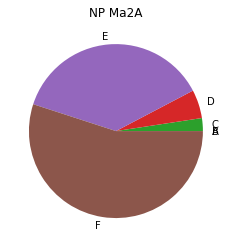

In [68]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots() #Figure is 432x288, AxesSubplot is (0.125,0.125;0.775x0.755)
_ = ax1.pie(percentage_grade2A, labels = grade2A) #Assigns it to _ so we do not get output in text form
_ = plt.title("NP Ma2A")


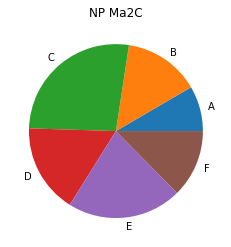

In [32]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
_ = ax1.pie(percentage_grade2C, labels = grade2C)
_ = plt.title("NP Ma2C")

## 4. Dice roll experiment

In [69]:
import random as rnd

with open("files/simulation.txt", "w") as sim:

    number_of_rolls = [10, 100, 1000, 10000, 100000, 1000000]
    for roll in number_of_rolls: 
        sim.write(f"Number of rolls: {roll}\n")
        numbers = [rnd.randint(1, 6) for _ in range(roll)]
        for number in range(1,7):
            sim.write(f"Number of {number}:s: {numbers.count(number)}. Probability: {(numbers.count(number))/roll}.\n")
        sim.write("\n")